### Assignment-2

### PCA and Dimensionality Reduction

#### Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
# Load and prepare the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(url, sep=";")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Dimensionality Reduction & Visualization

In [20]:
# Split into features (X) and target (y)
features = wine_data.drop('quality', axis=1)
quality = wine_data['quality']

# Normalize the data
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)
scaler

StandardScaler()

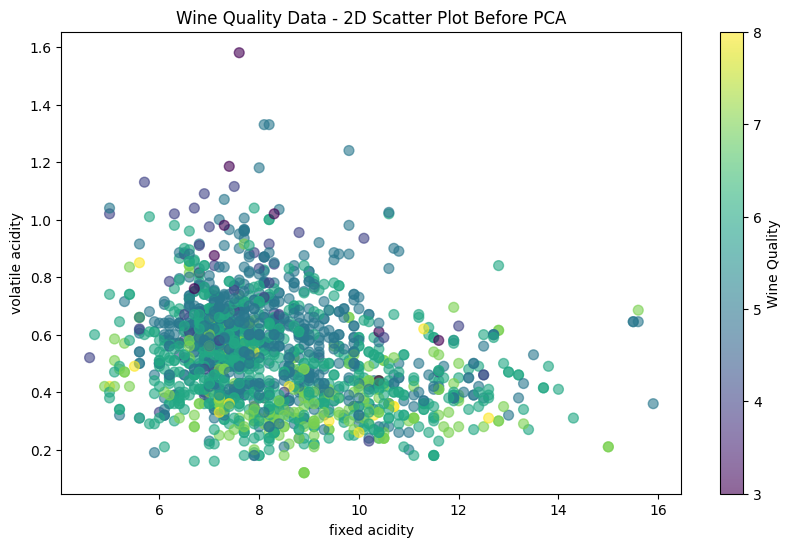

In [5]:
# 2D Scatter Plot Before PCA
plt.figure(figsize=(10, 6))
plt.scatter(features.iloc[:, 0], features.iloc[:, 1], c=quality, cmap='viridis', alpha=0.6, s=50)
plt.colorbar(label='Wine Quality')
plt.xlabel(features.columns[0])
plt.ylabel(features.columns[1])
plt.title('Wine Quality Data - 2D Scatter Plot Before PCA')
plt.show()

In [6]:
# PCA for 2D visualization
pca = PCA(n_components=2)
pca_result_2d = pca.fit_transform(normalized_features)
variance_explained = pca.explained_variance_ratio_
print(f"\nVariance explained by first two components: 
      {variance_explained[0]:.3f}, {variance_explained[1]:.3f}")


Variance explained by first two components: 0.282, 0.175


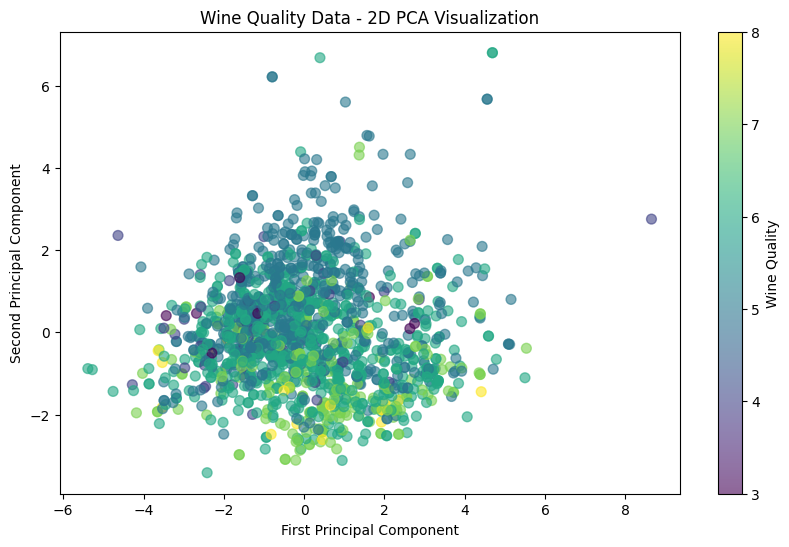

In [7]:
# 2D plot
plt.figure(figsize=(10, 6))
plt.scatter(pca_result_2d[:, 0], pca_result_2d[:, 1], c=quality, 
           cmap='viridis', alpha=0.6, s=50)
plt.colorbar(label='Wine Quality')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Wine Quality Data - 2D PCA Visualization')
plt.show()

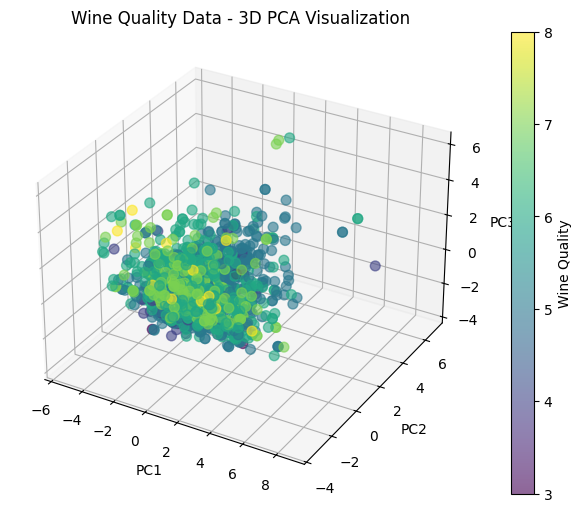

In [19]:
# PCA for 3D visualization
pca_3d = PCA(n_components=3)
pca_result_3d = pca_3d.fit_transform(normalized_features)

# 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_result_3d[:, 0], 
                    pca_result_3d[:, 1], 
                    pca_result_3d[:, 2], 
                    c=quality,
                    cmap='viridis', 
                    alpha=0.6,
                    s=50)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Wine Quality Data - 3D PCA Visualization')
plt.colorbar(scatter, label='Wine Quality')
plt.show()

#### Comparison with t-SNE

In [ ]:
# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(normalized_features)

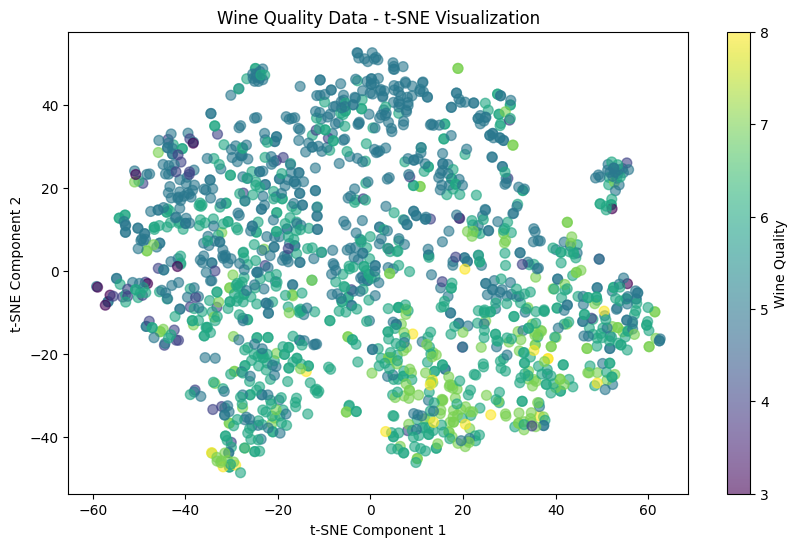

In [15]:
# Plot t-SNE results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], 
                     c=quality, cmap='viridis', alpha=0.6, s=50)
plt.colorbar(scatter, label='Wine Quality')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Wine Quality Data - t-SNE Visualization')
plt.show()

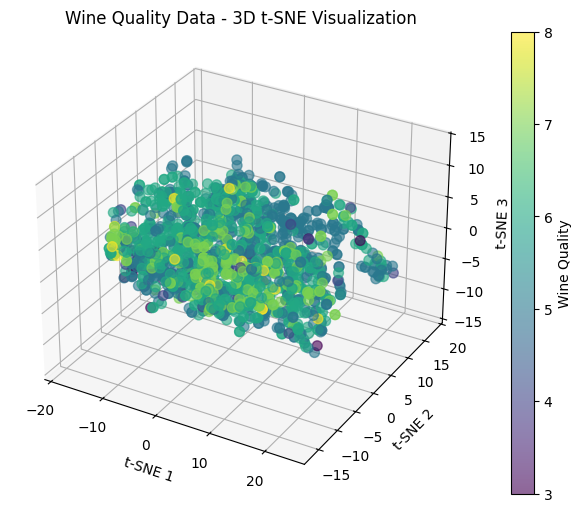

In [18]:
# 3D t-SNE
tsne_3d = TSNE(n_components=3, random_state=42)
tsne_result_3d = tsne_3d.fit_transform(normalized_features)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(tsne_result_3d[:, 0], 
                    tsne_result_3d[:, 1], 
                    tsne_result_3d[:, 2], 
                    c=quality,
                    cmap='viridis', 
                    alpha=0.6,
                    s=50)
ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')
ax.set_zlabel('t-SNE 3')
ax.set_title('Wine Quality Data - 3D t-SNE Visualization')
plt.colorbar(scatter, label='Wine Quality')
plt.show()